In [2]:
import sys

# pyodine path on the machine
pyodine_path = '/Users/samkleiman/pyodine'

sys.path.append(pyodine_path)

import pyodine

In [3]:
from pyodine.lib.h5quick import h5print, h5data
import h5py

# the path to the I2 atlas
I2_path = pyodine_path + '/iodine_atlas/song_iodine_cell_01_65C.h5'

h = h5py.File(I2_path, 'r')
h5print(h)

print(h)
flux_normalized = h5data(h['flux_normalized'])
wavelength_air  = h5data(h['wavelength_air'])

print('\nLength of the wavelength/flux vectors:', len(wavelength_air))
print('\nFull wavelength range (air): {:.3f} - {:.3f} Angstrom'.format(
    wavelength_air[0], wavelength_air[-1]))


/
└ flux
└ flux_normalized
└ wavelength
└ wavelength_air
└ wavenumber
<HDF5 file "song_iodine_cell_01_65C.h5" (mode r)>

Length of the wavelength/flux vectors: 618003

Full wavelength range (air): 4988.607 - 6498.200 Angstrom


<>:13: SyntaxWarning: invalid escape sequence '\A'
<>:13: SyntaxWarning: invalid escape sequence '\A'
/var/folders/th/82vh89jd0lj1tv88p7hjcsb00000gn/T/ipykernel_4513/3673377465.py:13: SyntaxWarning: invalid escape sequence '\A'
  axs[1].set_xlabel('Wavelength [$\AA$]')


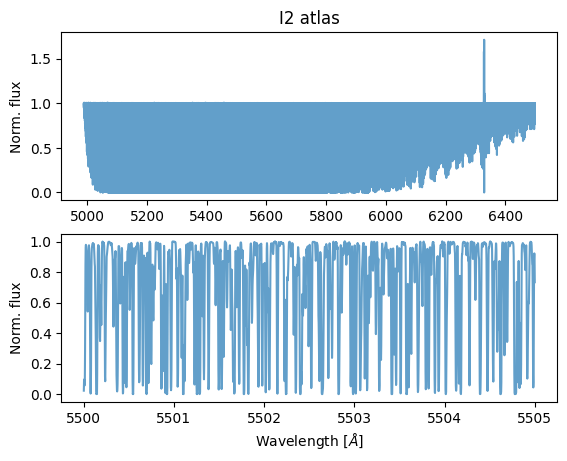

In [6]:
# Required packages
import matplotlib.pyplot as plt
import numpy as np

# Subset wavelengths
ind = np.where(np.logical_and(wavelength_air>5500., wavelength_air<5505.))

# Plot
fig, axs = plt.subplots(2)
axs[0].set_title('I2 atlas')
axs[0].plot(wavelength_air, flux_normalized, alpha=0.7)
axs[1].plot(wavelength_air[ind], flux_normalized[ind], alpha=0.7)
axs[1].set_xlabel('Wavelength [$\AA$]')
axs[0].set_ylabel('Norm. flux')
axs[1].set_ylabel('Norm. flux')
plt.show()

In [7]:
import utilities_song.pyodine_parameters as pyodine_parameters

help(pyodine_parameters)

Help on module utilities_song.pyodine_parameters in utilities_song:

NAME
    utilities_song.pyodine_parameters

DESCRIPTION
    Set here all the important parameters for the I2 reduction pipeline, both
    modeling of individual observations as well as the template creation.

    Paul Heeren, 3/02/2021

CLASSES
    builtins.object
        Parameters
        Template_Parameters

    class Parameters(builtins.object)
     |  The control commands for the main routine
     |
     |  The exact details of the algorithm are defined entirely by the parameters
     |  in this class: Parameters for chunk creation, general model parameters,
     |  and details about how many runs are used in the modelling and which LSF
     |  models are employed (and more).
     |
     |  Furthermore, in the class method :func:`self.constrain_parameters` you can
     |  specify and alter input parameter descriptions for the model, e.g. set
     |  bounds or fix parameters.
     |
     |  Methods defined here:
 

In [8]:
Pars = pyodine_parameters.Template_Parameters()

print('Oversampling of the model: ', Pars.osample_obs)
print('Orders of the spectra to use: ', Pars.temp_order_range)
print('Chunk width: ', Pars.chunk_width)
print('Model parameters (run 0):\n', Pars.model_runs[0])

print("*********************")
print(Pars)

Oversampling of the model:  6
Orders of the spectra to use:  (18, 41)
Chunk width:  91
Model parameters (run 0):
 {'lsf_model': <class 'pyodine.models.lsf.SingleGaussian'>, 'wave_model': <class 'pyodine.models.wave.LinearWaveModel'>, 'cont_model': <class 'pyodine.models.cont.LinearContinuumModel'>, 'pre_wave_slope_deg': 3, 'pre_wave_intercept_deg': 3, 'use_chauvenet_pixels': True, 'save_result': True, 'save_filetype': 'h5py', 'wave_slope_deg': 3, 'wave_intercept_deg': 3, 'plot_success': True, 'plot_analysis': True, 'plot_chunks': [150, 250, 400], 'plot_lsf_pars': True, 'save_median_pars': True}
*********************


In [9]:
pyodine_parameters

<module 'utilities_song.pyodine_parameters' from '/Users/samkleiman/pyodine/utilities_song/pyodine_parameters.py'>

In [12]:
print(pyodine_parameters.__file__)


/Users/samkleiman/pyodine/utilities_song/pyodine_parameters.py


In [14]:
import utilities_song.load_pyodine as load

print(load.ObservationWrapper.__name__)
print(load.ObservationWrapper.__doc__)

ObservationWrapper
A wrapper for the representation of SONG observation spectra, based
on the parent class :class:`pyodine.components.Observation`

:param filename: The filename of the observation to load.
:type filename: str
:param instrument: The instrument used to obtain the observation. If None,
    the information is drawn from the Fits-header (default).
:type instrument: :class:`components.Instrument`
:param star: The star of the observation. If None, the information is 
    drawn from the Fits-header (default).
:type star: :class:`components.Star`

